In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

c:\Users\desai\miniforge3\envs\crp4680\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [3]:
data = [
    [7, 7, 7, 6, 4, 6, 4, 7],
    [6, 5, 6, 5, 2, 5, 3, 7],
    [5, 4, 5, 5, 6, 4, 3, 5],
    [6, 5, 7, 4, 3, 6, 4, 6],
    [5, 6, 7, 4, 5, 6, 3, 5],
    [6, 6, 6, 5, 6, 6, 3, 6],
    [7, 7, 7, 6, 4, 7, 2, 6],
    [5, 5, 6, 5, 5, 5, 3, 6],
    [5, 5, 7, 4, 5, 5, 3, 5],
    [6, 6, 6, 5, 4, 5, 3, 5],
]

columns = [
    "Public Benefit", "Value", "Built Env Insights",
    "Security",  "Openness", "Workflow Integration","Ownership", "Future Adaptability"
]

df = pd.DataFrame(data, columns=columns)

In [4]:
df

,Public Benefit,Value,Built Env Insights,Security,Openness,Workflow Integration,Ownership,Future Adaptability
0,7,7,7,6,4,6,4,7
1,6,5,6,5,2,5,3,7
2,5,4,5,5,6,4,3,5
3,6,5,7,4,3,6,4,6
4,5,6,7,4,5,6,3,5
5,6,6,6,5,6,6,3,6
6,7,7,7,6,4,7,2,6
7,5,5,6,5,5,5,3,6
8,5,5,7,4,5,5,3,5
9,6,6,6,5,4,5,3,5


In [5]:
#transform data to be between -3 to 3
df_calibrated = df-4
df_calibrated.mean().sort_values(ascending=True)

Ownership              -0.9
Openness                0.4
Security                0.9
Workflow Integration    1.5
Value                   1.6
Public Benefit          1.8
Future Adaptability     1.8
Built Env Insights      2.4
dtype: float64

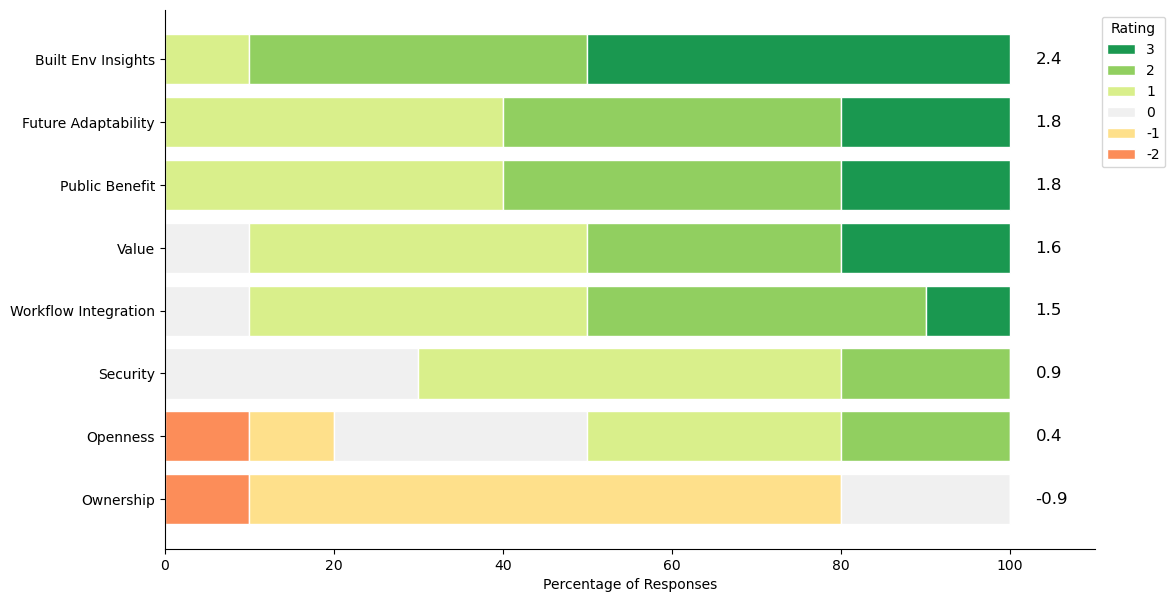

In [27]:
# Compute mean ratings and sort in descending order
mean_values = df.mean().sort_values(ascending=True)

# Count occurrences of each rating (1-7) for each question
response_counts = df.apply(lambda x: x.value_counts().sort_index()).fillna(0)
response_percentages = response_counts.div(response_counts.sum(axis=0), axis=1) * 100

# Sort response percentages accordingly
response_percentages_sorted = response_percentages[mean_values.index]

# Define colors
colors = {
    1: "#D73027", 2: "#FC8D59", 3: "#FEE08B", 4: "#F0F0F0",
    5: "#D9EF8B", 6: "#91CF60", 7: "#1A9850"
}

# Set up figure
fig, ax = plt.subplots(figsize=(12, 7))

# Stack bars for each response category
lefts = np.zeros(len(mean_values))  # Track cumulative position
for rating in sorted(response_percentages_sorted.index):  # Ensure order from 1 to 7
    ax.barh(mean_values.index, response_percentages_sorted.loc[rating], left=lefts, 
            color=colors[rating], edgecolor='white', label=str(rating-4) if rating not in ax.get_legend_handles_labels()[1] else "")
    lefts += response_percentages_sorted.loc[rating]

# Add mean values as markers
for i, (question, mean) in enumerate(mean_values.items()):
    ax.text(103, i, f"{(mean-4):.1f}", va="center", fontsize=12, color="black")

# Formatting
# csfont = {'fontname':'Times New Roman'}
# hfont = {'fontname':'Helvetica'}

ax.set_xlim(0, 110)  # Extra space for mean values
ax.set_xlabel("Percentage of Responses")
#ax.set_title("Diverging Stacked Bar Chart of Likert Scale Responses (Sorted by Mean)")
#ax.legend(title="Rating", bbox_to_anchor=(1.02, 1), loc='upper left')
handles, labels = ax.get_legend_handles_labels()
order = [labels.index("3"), labels.index("2"), labels.index("1"), 
     labels.index("0"), labels.index("-1"), labels.index("-2")]
ax.legend([handles[idx] for idx in order], [labels[idx] for idx in order], title="Rating", bbox_to_anchor=(1, 1), loc='upper left')

#ax.axvline(50, color='gray', linestyle="--", alpha=0.7)  # Midpoint reference

#hide top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)

plt.show()


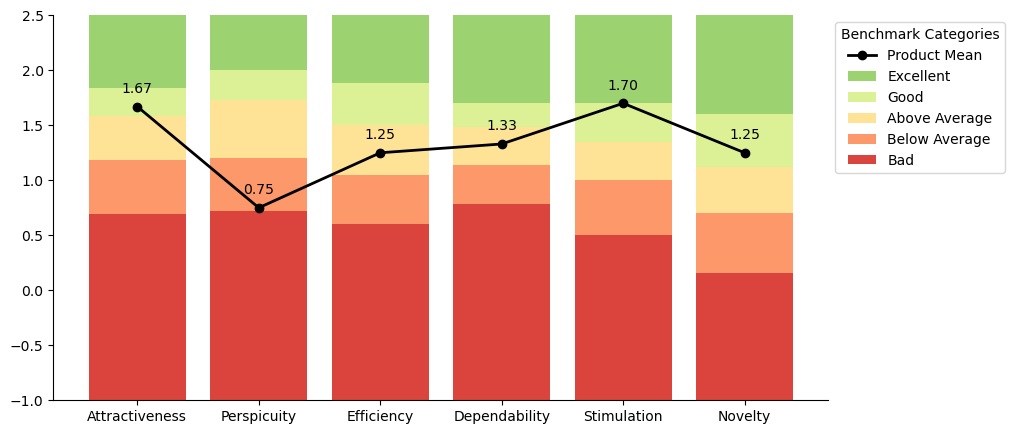

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data from benchmark
categories = ["Attractiveness", "Perspicuity", "Efficiency", "Dependability", "Stimulation", "Novelty"]
benchmark = pd.DataFrame({
    "Scale": categories,
    "Bad": [0.69, 0.72, 0.6, 0.78, 0.5, 0.16],
    "Below Average": [0.49, 0.48, 0.45, 0.36, 0.5, 0.54],
    "Above Average": [0.4, 0.53, 0.45, 0.34, 0.35, 0.42],
    "Good": [0.26, 0.27, 0.38, 0.22, 0.35, 0.48],
    "Excellent": [0.66, 0.5, 0.62, 0.8, 0.8, 0.9]
})
benchmark.set_index("Scale", inplace=True)

benchmark["Bad"] = benchmark["Bad"].apply(lambda x: 1+x)  # add one to account for chart starting at -1

# Your product evaluation means
product_means = {
    "Attractiveness": 1.67,
    "Perspicuity": 0.75,
    "Efficiency": 1.25,
    "Dependability": 1.33,
    "Stimulation": 1.70,
    "Novelty": 1.25
}

# Adjust benchmark data to start at -1
benchmark_adjusted = benchmark.copy()
benchmark_adjusted.iloc[:, 0] -= 1  # Start first category at -1 instead of 0
benchmark_cumsum = benchmark_adjusted.cumsum(axis=1)  # Compute cumulative sums

# Plot settings
fig, ax = plt.subplots(figsize=(10, 5))

# Stacked bar chart
bottoms = [-1] * len(categories)  # Start stacking from -1
colors = ["#D73027", "#FC8D59", "#FEE08B", 
    "#D9EF8B", "#91CF60" ]
#["#d73027", "#fc8d59", "#fee08b", "#d9ef8b", "#91cf60"]  # Red to Green

for i, col in enumerate(benchmark.columns):
    ax.bar(categories, benchmark[col], bottom=bottoms, color=colors[i], 
           #edgecolor="black", 
           label=col, 
           alpha=0.9
           )
    bottoms = benchmark_cumsum[col]  # Update bottom position for next stack

# Overlay product means as a line plot
x_positions = np.arange(len(categories))
product_values = [product_means[cat] for cat in categories]
ax.plot(x_positions, product_values, marker='o', color='black', linestyle='-', linewidth=2, label="Product Mean")
for i, value in enumerate(product_values):
  ax.text(x_positions[i], value + 0.1, f"{value:.2f}", ha='center', va='bottom', fontsize=10, color='black')

# Set the y-axis limits
ax.set_ylim(-1, max(benchmark_cumsum.max().max(), max(product_means.values()) + 0.5))

# Labels and formatting
#ax.set_ylabel("Scale Score")
#ax.set_title("Benchmark Stacked Chart with Product Evaluation Overlay")
ax.set_xticks(x_positions)
#ax.set_xticklabels(categories, rotation=45, ha="right")
handles, labels = ax.get_legend_handles_labels()
order = [labels.index("Product Mean"), labels.index("Excellent"), labels.index("Good"), 
     labels.index("Above Average"), labels.index("Below Average"), labels.index("Bad")]
ax.legend([handles[idx] for idx in order], [labels[idx] for idx in order], title="Benchmark Categories", bbox_to_anchor=(1, 1), loc='upper left')

#hide top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

1: data
2: UI
3: analysis
4: engagement

In [8]:
# Re-import necessary libraries since execution state was reset
from collections import defaultdict
import numpy as np

# Input rankings from 10 respondents
rankings = [
    ["data", "UI", "Analysis", "Stakeholder Engagement"],
    ["Analysis", "Data", "UI", "Stakeholder Engagement"],
    ["data", "UI", "Analysis", "Stakeholder Engagement"],
    ["Analysis", "Stakeholder Engagement", "UI", "data"],
    ["data", "Stakeholder Engagement", "Analysis", "UI"],
    ["Analysis", "UI", "Stakeholder Engagement", "Data"],
    ["data", "UI", "Stakeholder Engagement", "Analysis"],
    ["Stakeholder Engagement", "UI", "Data", "Analysis"],
    ["User Interface = Stakeholder Engagement", "Data", "Analytical Tools"],
    ["Analysis", "Data", "UI", "Stakeholder Engagement"],
]

# Normalize names (User Interface = UI, Analytical Tools = Analysis)
for i in range(len(rankings)):
    rankings[i] = [r.replace("User Interface", "UI").replace("Analytical Tools", "Analysis").replace("data", "Data") for r in rankings[i]]
    rankings[i] = [item.strip() for r in rankings[i] for item in r.split("=")]  # Handle ties

# Define unique categories
categories = {"Analysis", "Stakeholder Engagement", "UI", "Data"}

# Compute Average Rank Method
rank_sums = defaultdict(list)
for ranking in rankings:
    for rank, category in enumerate(ranking, start=1):
        rank_sums[category].append(rank)

mean_ranks = {category: np.mean(rank_sums[category]) for category in categories}

# Compute Borda Count Method
borda_scores = defaultdict(int)
num_categories = len(categories)

for ranking in rankings:
    for rank, category in enumerate(ranking[::-1], start=1):  # Highest gets most points
        borda_scores[category] += rank

# Sort results
mean_ranks_sorted = sorted(mean_ranks.items(), key=lambda x: x[1])  # Lower is better
borda_scores_sorted = sorted(borda_scores.items(), key=lambda x: x[1], reverse=True)  # Higher is better

mean_ranks_sorted, borda_scores_sorted

([('Data', 2.2),
  ('UI', 2.4),
  ('Analysis', 2.5),
  ('Stakeholder Engagement', 2.9)],
 [('Data', 28), ('UI', 26), ('Analysis', 25), ('Stakeholder Engagement', 21)])

In [9]:
# Re-import necessary libraries since execution state was reset
from collections import defaultdict
import numpy as np

# Input rankings from 10 respondents
rankings = [
    ["data", "UI", "Analysis", "Stakeholder Engagement"],
    ["Analysis", "Data", "UI", "Stakeholder Engagement"],
    ["data", "UI", "Analysis", "Stakeholder Engagement"],
    ["Analysis", "Stakeholder Engagement", "UI", "data"],
    ["data", "Stakeholder Engagement", "Analysis", "UI"],
    ["Analysis", "UI", "Stakeholder Engagement", "Data"],
    ["data", "UI", "Stakeholder Engagement", "Analysis"],
    ["Stakeholder Engagement", "UI", "Data", "Analysis"],
    ["User Interface = Stakeholder Engagement", "Data", "Analytical Tools"],
    ["Analysis", "Data", "UI", "Stakeholder Engagement"],
]

# Normalize names (User Interface = UI, Analytical Tools = Analysis, data = Data)
for i in range(len(rankings)):
    rankings[i] = [r.replace("User Interface", "UI").replace("Analytical Tools", "Analysis").replace("data", "Data") for r in rankings[i]]

# Define unique categories
categories = {"Analysis", "Stakeholder Engagement", "UI", "Data"}

# Compute Average Rank Method with proper tie handling
rank_sums = defaultdict(list)

for ranking in rankings:
    processed_ranking = []
    rank_positions = []
    
    for i, item in enumerate(ranking):
        tied_items = [x.strip() for x in item.split("=")]  # Split ties
        avg_rank = sum(range(i + 1, i + 1 + len(tied_items))) / len(tied_items)  # Compute average rank for tied items
        
        for tied_item in tied_items:
            processed_ranking.append(tied_item)
            rank_positions.append(avg_rank)

    for category, rank in zip(processed_ranking, rank_positions):
        rank_sums[category].append(rank)

mean_ranks = {category: np.mean(rank_sums[category]) for category in categories}

# Compute Borda Count Method with proper tie handling
borda_scores = defaultdict(int)
num_categories = len(categories)

for ranking in rankings:
    processed_ranking = []
    rank_positions = []
    
    for i, item in enumerate(ranking[::-1]):  # Borda count gives highest value to the top-ranked items
        tied_items = [x.strip() for x in item.split("=")]  # Split ties
        avg_points = sum(range(i + 1, i + 1 + len(tied_items))) / len(tied_items)  # Compute average points for tied items

        for tied_item in tied_items:
            processed_ranking.append(tied_item)
            rank_positions.append(avg_points)

    for category, points in zip(processed_ranking, rank_positions):
        borda_scores[category] += points

# Sort results
mean_ranks_sorted = sorted(mean_ranks.items(), key=lambda x: x[1])  # Lower is better
borda_scores_sorted = sorted(borda_scores.items(), key=lambda x: x[1], reverse=True)  # Higher is better

mean_ranks_sorted, borda_scores_sorted

([('Data', 2.1),
  ('Analysis', 2.4),
  ('UI', 2.45),
  ('Stakeholder Engagement', 2.85)],
 [('Data', 28.0),
  ('UI', 25.5),
  ('Analysis', 25.0),
  ('Stakeholder Engagement', 21.5)])

C:\Users\desai\AppData\Local\Temp\ipykernel_38572\4021587831.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(categories)


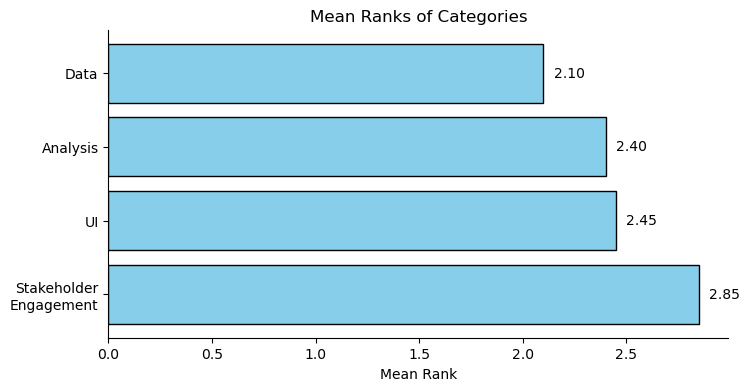

In [17]:
# plot mean ranks
# Extract categories and their mean ranks
categories = [item[0] for item in mean_ranks_sorted]
mean_values = [item[1] for item in mean_ranks_sorted]

# Plot mean ranks
fig, ax = plt.subplots(figsize=(8, 4))
ax.barh(categories, mean_values, color='skyblue', edgecolor='black')

# Add labels to bars
for i, v in enumerate(mean_values):
  ax.text(v + 0.05, i, f"{v:.2f}", va='center', fontsize=10)

# Break long category names into multiple lines
categories = [cat.replace("Stakeholder Engagement", "Stakeholder\nEngagement") for cat in categories]
ax.set_yticklabels(categories)

# Formatting
ax.set_xlabel("Mean Rank")
ax.set_title("Mean Ranks of Categories")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.invert_yaxis()  # Highest rank at the top
plt.show()